### Import the necessary liberaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime 

# from load_data import load_csv
%matplotlib inline

In [ ]:
import sys
sys.path.append('../scripts/')
from calculations import calculate_z_scores


### Load the datasets

In [4]:
# load the benin Solar Radiation Measurement Data into a DataFrame

benin_df = pd.read_csv('../src/data/benin-malanville.csv')
sierrleone_df = pd.read_csv('../src/data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../src/data/togo-dapaong_qc.csv')

In [5]:
# check that you have loaded the data correctly by displaying the head of the DataFrames.

benin_df.head(5)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [6]:
benin_df.tail(5)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN

In [7]:
benin_df.shape

(525600, 19)

In [8]:
sierrleone_df.head(5)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [9]:
sierrleone_df.shape

(525600, 19)

In [10]:
togo_df.head(5)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [11]:
togo_df.shape

(525600, 19)

**View basic information about the datasets**

 >Get an overview of the dataset, including the number of rows and columns.

In [12]:
print(benin_df.dtypes)
print(sierrleone_df.dtypes)
print(togo_df.dtypes)


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object
Timestamp         obje

### Data Cleaning


**Handle Missing Values**

> Identify missing values and decide how to handle them (e.g., imputation, removal)

In [13]:
print(benin_df['Comments'].isnull().sum())

print(sierrleone_df['Comments'].isnull().sum())

print(togo_df['Comments'].isnull().sum())


525600
525600
525600


In [14]:
# Drop the null column : Comments
benin_df.drop('Comments', axis=1, inplace=True)
sierrleone_df.drop('Comments', axis=1, inplace=True)
togo_df.drop('Comments', axis=1, inplace=True)

**Check for Duplicates:** 

>Identify and remove duplicate rows if necessary.

In [15]:
print(benin_df.duplicated().sum(), sierrleone_df.duplicated().sum(), togo_df.duplicated().sum())


0 0 0


In [16]:
# Convert the 'Timestamp' column to datetime format for benin Dataframe
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])

# Extract only the date part (year/month/day)
benin_df['Date'] = benin_df['Timestamp'].dt.date

# Drop the original Timestamp column
benin_df.drop('Timestamp', axis=1, inplace=True)

# Reorder columns to place 'Date' where 'Timestamp' was
current_order = benin_df.columns.tolist()
new_order = ['Date'] + [col for col in current_order if col != 'Date']
benin_df = benin_df[new_order]

benin_df.head(5)


Date  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  \
0  2021-08-09 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1   
1  2021-08-09 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0   
2  2021-08-09 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5   
3  2021-08-09 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4   
4  2021-08-09 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3   

      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0  122.1      0.0  998         0            0.0   26.3   26.2  
1    0.0      0.0  998         0            0.0   26.3   26.2  
2  124.6      1.5  997         0            0.0   26.4   26.2  
3  120.3      1.3  997         0            0.0   26.4   26.3  
4  113.2      1.0  997         0            0.0   26.4   26.3

In [17]:
# benin_df.head(5)
# benin_df.info()
print(type(benin_df['Date']))
benin_df.dtypes


<class 'pandas.core.series.Series'>


Date              object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

### Summary Statistics

In [18]:
# Calculate summary statistics for all numeric columns
summary_statistics = benin_df.describe().T
summary_statistics

count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0.0    3.7    8.6   12.3   
BP             525600.0  994.197199    2.474993  985.0  993.0  994.0  996.0   
Cleaning       525600.0    0.000923    0.030363    0.0    0.0    0.0    0.0   
Precipitation  525600.0    0.001905    0.037115    0.0    0.0    0.0    0.0   
TModA          525600.0   35.246026   14.807258    9.0   24.2   30.0   46.9   
TModB          525600.0   32.471736   12.348743    8.1   23.6   28.9   41.5   

                  max  
GHI            1413.0  
DNI             952.3  
DHI             759.2  
ModA           1342.3  
ModB           1342.3  
Tamb             43.8  
RH              100.0  
WS               19.5  
WSgust           26.6  
WSstdev           4.2  
WD              360.0  
WDstdev          99.4  
BP             1003.0  
Cleaning          1.0  
Precipitation     2.5  
TModA            81.0  
TModB            72.5

In [19]:
# Additional statistics
num_benin_df = benin_df.select_dtypes(include=['number'])  # Select only numeric columns
summary_statistics['median'] = num_benin_df.median()
summary_statistics['mode'] = num_benin_df.mode().iloc[0]  # Mode (first mode if there are multiple)
summary_statistics['variance'] = num_benin_df.var()  # Variance
summary_statistics['range'] = num_benin_df.max() - num_benin_df.min()  # Range
summary_statistics['iqr'] = num_benin_df.quantile(0.75) - num_benin_df.quantile(0.25)  # Interquartile Range (IQR)
summary_statistics['skewness'] = num_benin_df.skew()  # Skewness
summary_statistics['kurtosis'] = num_benin_df.kurt()  # Kurtosis

# Display the summary statistics
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                   count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.5

### Data Quality Check

In [20]:
num_benin_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  525600.000000  
mean       32.471736  
std        12.348743  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000

In [21]:
num_benin_df.head(10)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
5 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4      0.1  119.1   
6 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0      0.0    0.0   
7 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3      0.6  126.8   
8 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1      0.5  124.9   
9 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1      0.5  114.2   

   WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.0  998         0            0.0   26.3   26.2  
1      0.0  998         0            0.0   26.3   26.2  
2      1.5  997         0            0.0   26.4   26.2  
3      1.3  997         0            0.0   26.4   26.3  
4      1.0  997         0            0.0   26.4   26.3  
5      0.0  997         0            0.0   26.4   26.3  
6      0.0  997         0            0.0   26.5   26.3  
7      2.8  997         0            0.0   26.5   26.3  
8      5.5  997         0            0.0   26.5   26.4  
9      5.1  997         0            0.0   26.5   26.4

In [22]:
# Replace negative values with zero
num_benin_df[num_benin_df < 0] = 0
num_benin_df

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0       0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1       0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2       0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3       0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4       0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
...     ...  ...  ...   ...   ...   ...   ...  ...     ...      ...    ...   
525595  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.3     1.1      0.5  119.3   
525596  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.2     0.7      0.4  115.2   
525597  0.0  0.0  0.0   0.0   0.0  23.1  98.4  0.6     1.1      0.5  129.8   
525598  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.9     1.3      0.5  124.4   
525599  0.0  0.0  0.0   0.0   0.0  23.1  98.3  1.2     1.6      0.3  124.1   

        WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0           0.0  998         0            0.0   26.3   26.2  
1           0.0  998         0            0.0   26.3   26.2  
2           1.5  997         0            0.0   26.4   26.2  
3           1.3  997         0            0.0   26.4   26.3  
4           1.0  997         0            0.0   26.4   26.3  
...         ...  ...       ...            ...    ...    ...  
525595      4.1  996         0            0.0   23.5   22.9  
525596      2.3  996         0            0.0   23.5   22.9  
525597      3.4  996         0            0.0   23.5   22.9  
525598      4.3  996         0            0.0   23.5   22.9  
525599      5.9  996         0            0.0   23.5   22.9  

[525600 rows x 17 columns]

In [23]:
num_benin_df

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0       0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1       0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2       0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3       0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4       0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
...     ...  ...  ...   ...   ...   ...   ...  ...     ...      ...    ...   
525595  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.3     1.1      0.5  119.3   
525596  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.2     0.7      0.4  115.2   
525597  0.0  0.0  0.0   0.0   0.0  23.1  98.4  0.6     1.1      0.5  129.8   
525598  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.9     1.3      0.5  124.4   
525599  0.0  0.0  0.0   0.0   0.0  23.1  98.3  1.2     1.6      0.3  124.1   

        WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0           0.0  998         0            0.0   26.3   26.2  
1           0.0  998         0            0.0   26.3   26.2  
2           1.5  997         0            0.0   26.4   26.2  
3           1.3  997         0            0.0   26.4   26.3  
4           1.0  997         0            0.0   26.4   26.3  
...         ...  ...       ...            ...    ...    ...  
525595      4.1  996         0            0.0   23.5   22.9  
525596      2.3  996         0            0.0   23.5   22.9  
525597      3.4  996         0            0.0   23.5   22.9  
525598      4.3  996         0            0.0   23.5   22.9  
525599      5.9  996         0            0.0   23.5   22.9  

[525600 rows x 17 columns]

In [24]:
# Ensure the modified numeric DataFrame has the same index as the original DataFrame
num_benin_df.index = benin_df.index

# Update the original DataFrame with the modified numeric values
for col in num_benin_df.columns:
    benin_df[col] = num_benin_df[col]

# Display the updated original DataFrame
benin_df.head(10)


Date  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  \
0  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4      0.1   
1  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0      0.0   
2  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1      0.5   
3  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4   
4  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3   
5  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.8  0.0     0.4      0.1   
6  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.0     0.0      0.0   
7  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.7     1.3      0.6   
8  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.4     1.1      0.5   
9  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.5     1.1      0.5   

      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0  122.1      0.0  998         0            0.0   26.3   26.2  
1    0.0      0.0  998         0            0.0   26.3   26.2  
2  124.6      1.5  997         0            0.0   26.4   26.2  
3  120.3      1.3  997         0            0.0   26.4   26.3  
4  113.2      1.0  997         0            0.0   26.4   26.3  
5  119.1      0.0  997         0            0.0   26.4   26.3  
6    0.0      0.0  997         0            0.0   26.5   26.3  
7  126.8      2.8  997         0            0.0   26.5   26.3  
8  124.9      5.5  997         0            0.0   26.5   26.4  
9  114.2      5.1  997         0            0.0   26.5   26.4

>The IQR method calculates the interquartile range (IQR) and identifies outliers as those values falling outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
It flags rows where any of the selected columns have values outside the calculated IQR boundaries.

In [25]:
# Columns to check for outliers
cols_check = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = benin_df[cols_check].quantile(0.25)
Q3 = benin_df[cols_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((benin_df[cols_check] < (Q1 - 1.5 * IQR)) | (benin_df[cols_check] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Outliers detected using IQR:\n{benin_df[outliers_iqr][cols_check]}")


Outliers detected using IQR:
          ModA    ModB   WS  WSgust
671     1210.3  1210.3  3.4     4.1
674     1281.5  1281.5  4.0     4.6
676     1267.3  1267.3  2.7     3.6
849     1156.0  1155.0  3.3     3.9
850     1218.0  1217.0  2.2     3.1
...        ...     ...  ...     ...
525151     6.0     5.9  7.3     8.7
525152     6.0     5.9  6.3     8.2
525155     6.0     5.9  6.9     8.9
525156     6.0     5.9  6.5     8.2
525159     5.9     5.7  6.3     8.4

[7710 rows x 4 columns]


*7710 outliers exist in the benin data* 

### Time Series Analysis

In [24]:
# Set 'Date' as the index
benin_df.set_index('Date', inplace=True)

# Plot line graphs for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(30, 15))

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

In [25]:
# Display unique values in the 'Date' column
# benin_df.columns
# unique_date_values = benin_df['Date'].unique()
# print("Unique values in 'Date' column:", unique_date_values)

# benin_df = benin_df.reset_index()
benin_df

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  \
Date                                                                      
2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4      0.1   
2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0      0.0   
2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1      0.5   
2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4   
2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3   
...         ...  ...  ...   ...   ...   ...   ...  ...     ...      ...   
2022-08-08  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.3     1.1      0.5   
2022-08-08  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.2     0.7      0.4   
2022-08-08  0.0  0.0  0.0   0.0   0.0  23.1  98.4  0.6     1.1      0.5   
2022-08-08  0.0  0.0  0.0   0.0   0.0  23.1  98.3  0.9     1.3      0.5   
2022-08-09  0.0  0.0  0.0   0.0   0.0  23.1  98.3  1.2     1.6      0.3   

               WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
Date                                                                    
2021-08-09  122.1      0.0  998         0            0.0   26.3   26.2  
2021-08-09    0.0      0.0  998         0            0.0   26.3   26.2  
2021-08-09  124.6      1.5  997         0            0.0   26.4   26.2  
2021-08-09  120.3      1.3  997         0            0.0   26.4   26.3  
2021-08-09  113.2      1.0  997         0            0.0   26.4   26.3  
...           ...      ...  ...       ...            ...    ...    ...  
2022-08-08  119.3      4.1  996         0            0.0   23.5   22.9  
2022-08-08  115.2      2.3  996         0            0.0   23.5   22.9  
2022-08-08  129.8      3.4  996         0            0.0   23.5   22.9  
2022-08-08  124.4      4.3  996         0            0.0   23.5   22.9  
2022-08-09  124.1      5.9  996         0            0.0   23.5   22.9  

[525600 rows x 17 columns]

In [26]:
import matplotlib.dates as mdates


# Apply tight layout to prevent label overlap
plt.tight_layout()

# Line plot for GHI
plt.subplot(2, 2, 1)
plt.plot(benin_df['GHI'], label='GHI', color='orange')
plt.title('GHI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('GHI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for DNI
plt.subplot(2, 2, 2)
plt.plot(benin_df['DNI'], label='DNI', color='blue')
plt.title('DNI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('DNI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for DHI
plt.subplot(2, 2, 3)
plt.plot(benin_df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('DHI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for Tamb
plt.subplot(2, 2, 4)
plt.plot(benin_df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Tamb (°C)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.
plt.tight_layout()
plt.show()

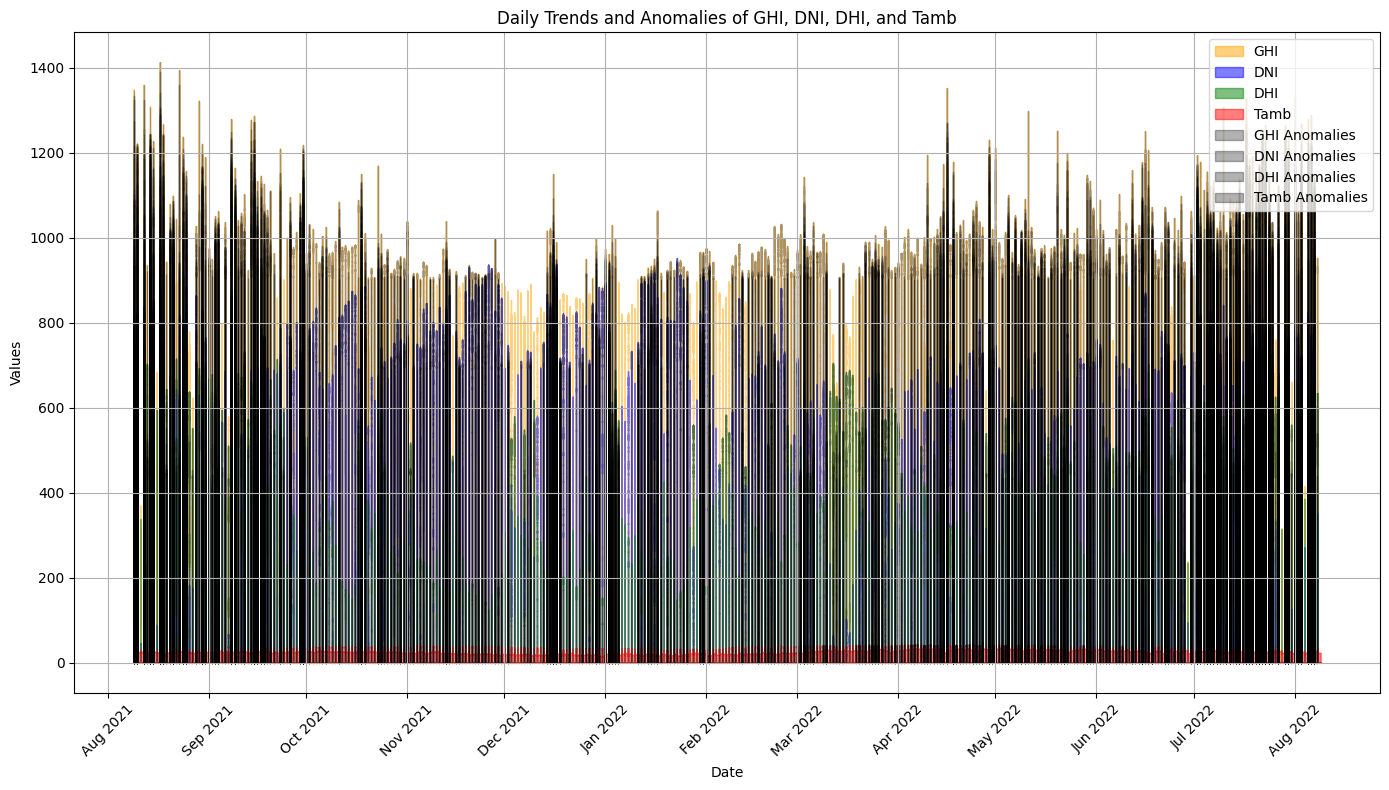

In [27]:
plt.figure(figsize=(14, 8))

# Plot GHI
plt.fill_between(benin_df.index, benin_df['GHI'], color='orange', alpha=0.5, label='GHI')

# Plot DNI
plt.fill_between(benin_df.index, benin_df['DNI'], color='blue', alpha=0.5, label='DNI')

# Plot DHI
plt.fill_between(benin_df.index, benin_df['DHI'], color='green', alpha=0.5, label='DHI')

# Plot Tamb
plt.fill_between(benin_df.index, benin_df['Tamb'], color='red', alpha=0.5, label='Tamb')

# Highlight anomalies
thresholds = {
    'GHI': benin_df['GHI'].mean() + 2 * benin_df['GHI'].std(),
    'DNI': benin_df['DNI'].mean() + 2 * benin_df['DNI'].std(),
    'DHI': benin_df['DHI'].mean() + 2 * benin_df['DHI'].std(),
    'Tamb': benin_df['Tamb'].mean() + 2 * benin_df['Tamb'].std()
}

for col, thresh in thresholds.items():
    plt.fill_between(benin_df.index, 0, benin_df[col], where=(benin_df[col] > thresh), color='black', alpha=0.3, label=f'{col} Anomalies')

# Set title and labels
plt.title('Daily Trends and Anomalies of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')

# Format x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Plot Sensor Readings with Cleaning Indicator**

In [28]:
benin_df[['Cleaning','ModA','ModB']].describe()

Cleaning           ModA           ModB
count  525600.000000  525600.000000  525600.000000
mean        0.000923     236.589496     228.883576
std         0.030363     326.894859     316.536515
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       4.500000       4.300000
75%         0.000000     463.700000     447.900000
max         1.000000    1342.300000    1342.300000

In [29]:
# plt.figure(figsize=(14, 8))

# # Plot ModA
# plt.plot(benin_df['ModA'], label='ModA', color='blue', linestyle='-', marker='o', alpha=0.7)

# # Plot ModB
# plt.plot(benin_df['ModB'], label='ModB', color='green', linestyle='-', marker='o', alpha=0.7)

# # Highlight cleaning periods
# cleaning_dates = benin_df[benin_df['Cleaning'] == 1].index
# plt.scatter(cleaning_dates, benin_df.loc[cleaning_dates, 'ModA'], color='red', label='Cleaning Periods', marker='x')
# plt.scatter(cleaning_dates, benin_df.loc[cleaning_dates, 'ModB'], color='orange', marker='x')

# # Set title and labels
# plt.title('Sensor Readings (ModA, ModB) with Cleaning Indicator')
# plt.xlabel('Date')
# plt.ylabel('Sensor Readings')

# # Format x-axis for dates
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.
# plt.xticks(rotation=45)

# # Add legend and grid
# plt.legend()
# plt.grid(True)

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


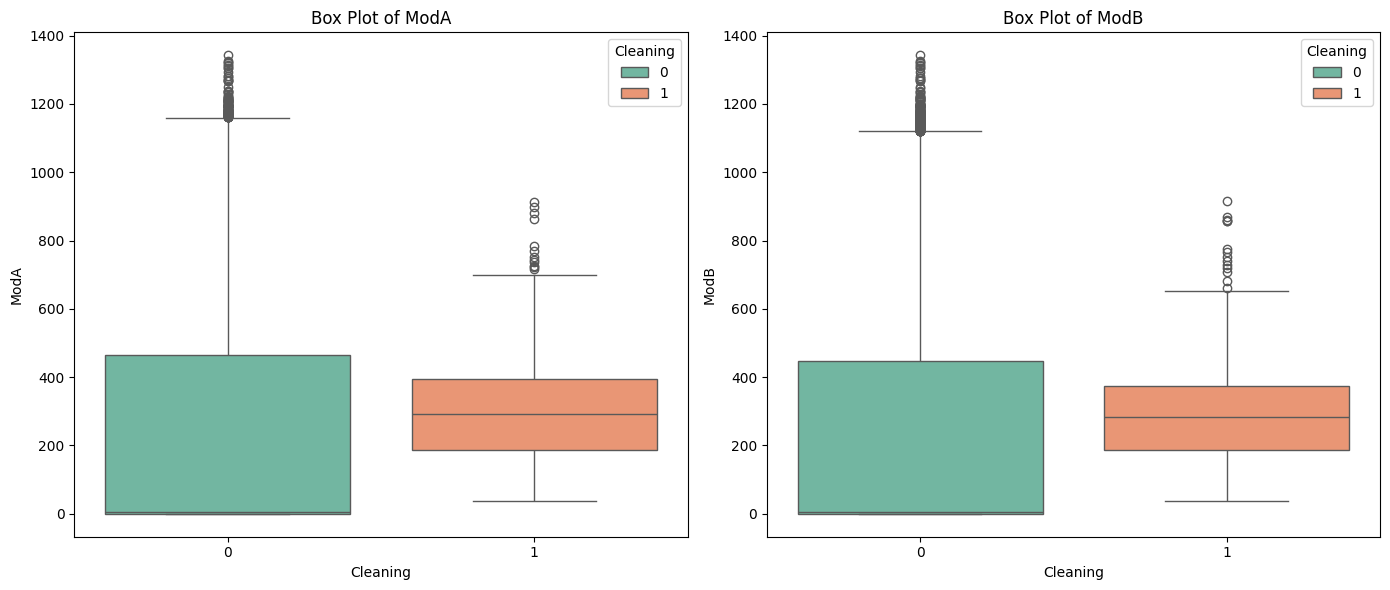

In [30]:

plt.figure(figsize=(14, 6))

# Box plot for ModA
plt.subplot(1, 2, 1)
sb.boxplot(x='Cleaning', y='ModA', data=benin_df, hue='Cleaning', palette='Set2')
plt.title('Box Plot of ModA')

# Box plot for ModB
plt.subplot(1, 2, 2)
sb.boxplot(x='Cleaning', y='ModB', data=benin_df, hue='Cleaning', palette='Set2')
plt.title('Box Plot of ModB')

plt.tight_layout()
plt.show();

In [31]:
# Compute summary statistics grouped by 'Cleaning'
summary_stats = benin_df.groupby('Cleaning')[['ModA', 'ModB']].describe()
print(summary_stats)


              ModA                                                             \
             count        mean         std   min    25%    50%    75%     max   
Cleaning                                                                        
0         525115.0  236.524253  327.002662   0.0    0.0    4.3  463.9  1342.3   
1            485.0  307.229278  159.987048  37.1  187.8  291.7  393.9   914.0   

              ModB                                                             
             count        mean         std   min    25%    50%    75%     max  
Cleaning                                                                       
0         525115.0  228.816071  316.640506   0.0    0.0    4.2  448.1  1342.3  
1            485.0  301.972165  153.643905  37.3  186.1  283.2  375.2   917.0  


### Correlation Analysis

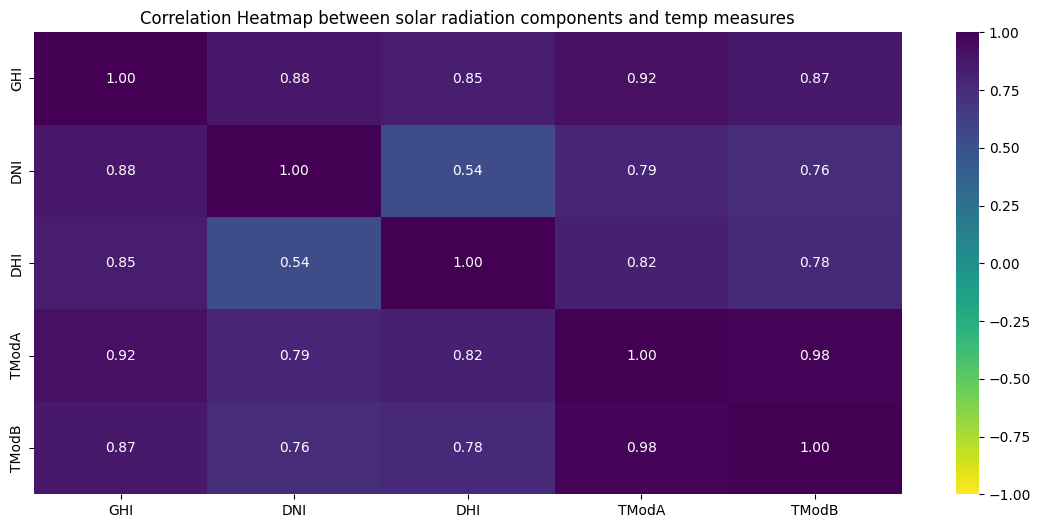

In [32]:
# Compute the correlation matrix
corr_matrix = benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot the heatmap
plt.figure(figsize=(14, 6))
sb.heatmap(corr_matrix, annot=True, cmap='viridis_r', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between solar radiation components and temp measures')
plt.show()


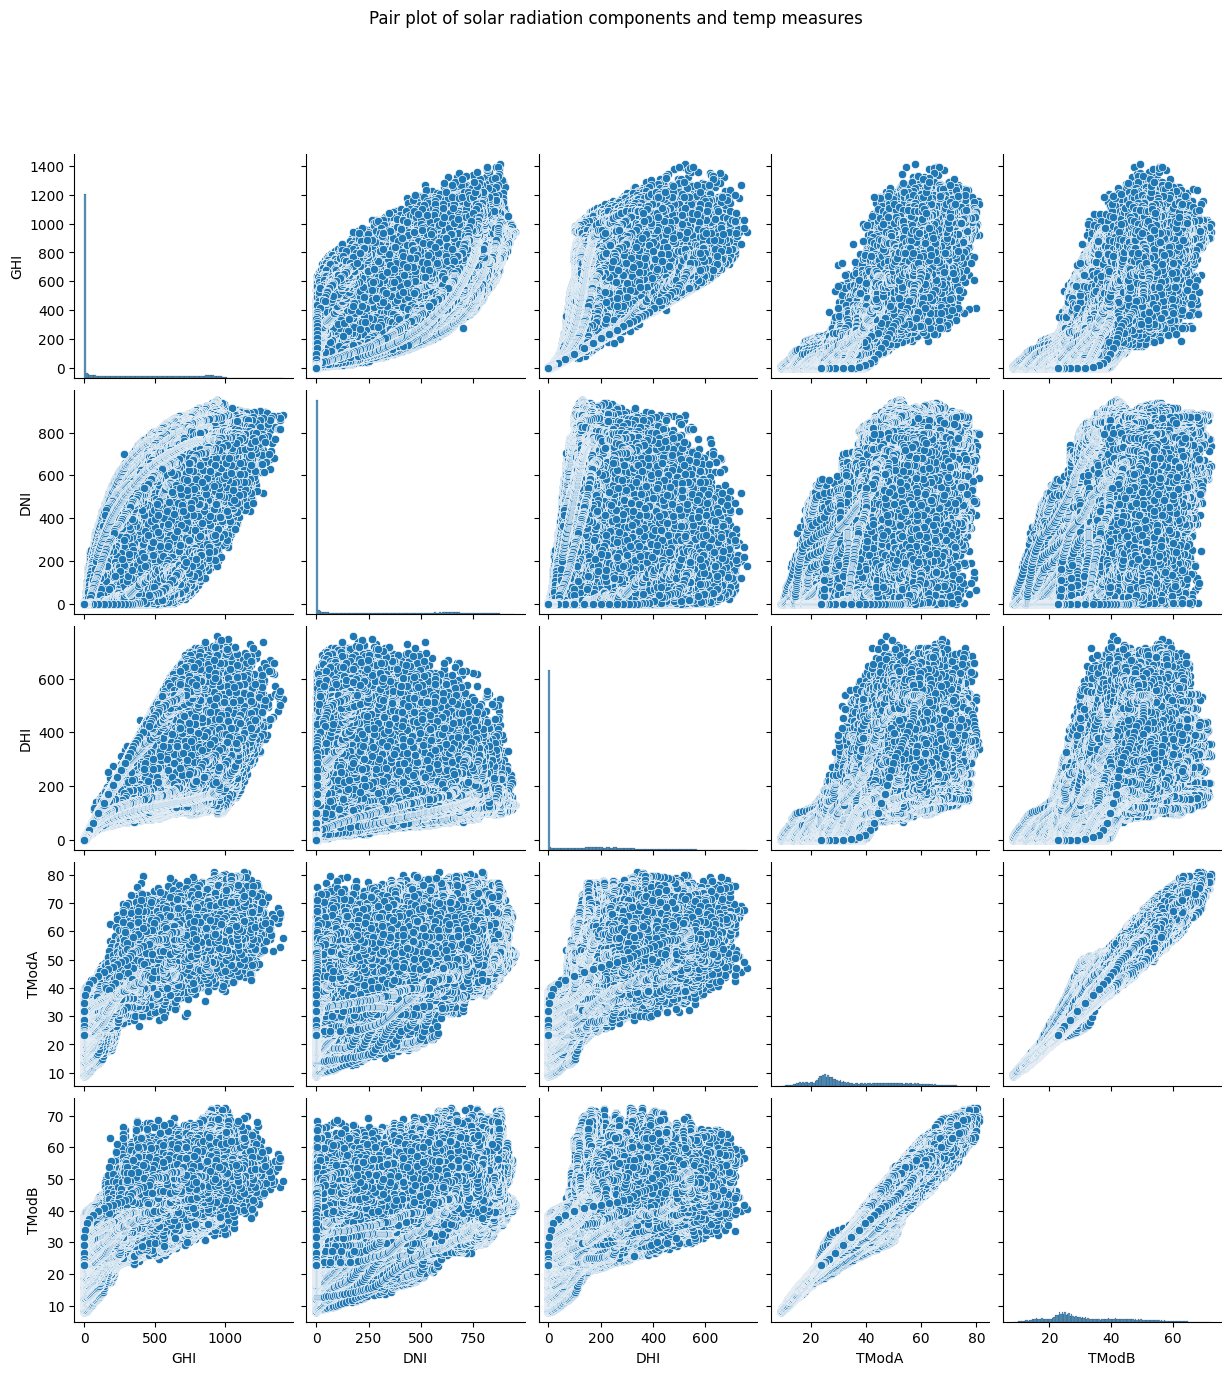

In [33]:
# or pair plot
sb.pairplot(benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair plot of solar radiation components and temp measures', y=1.1)
plt.show()

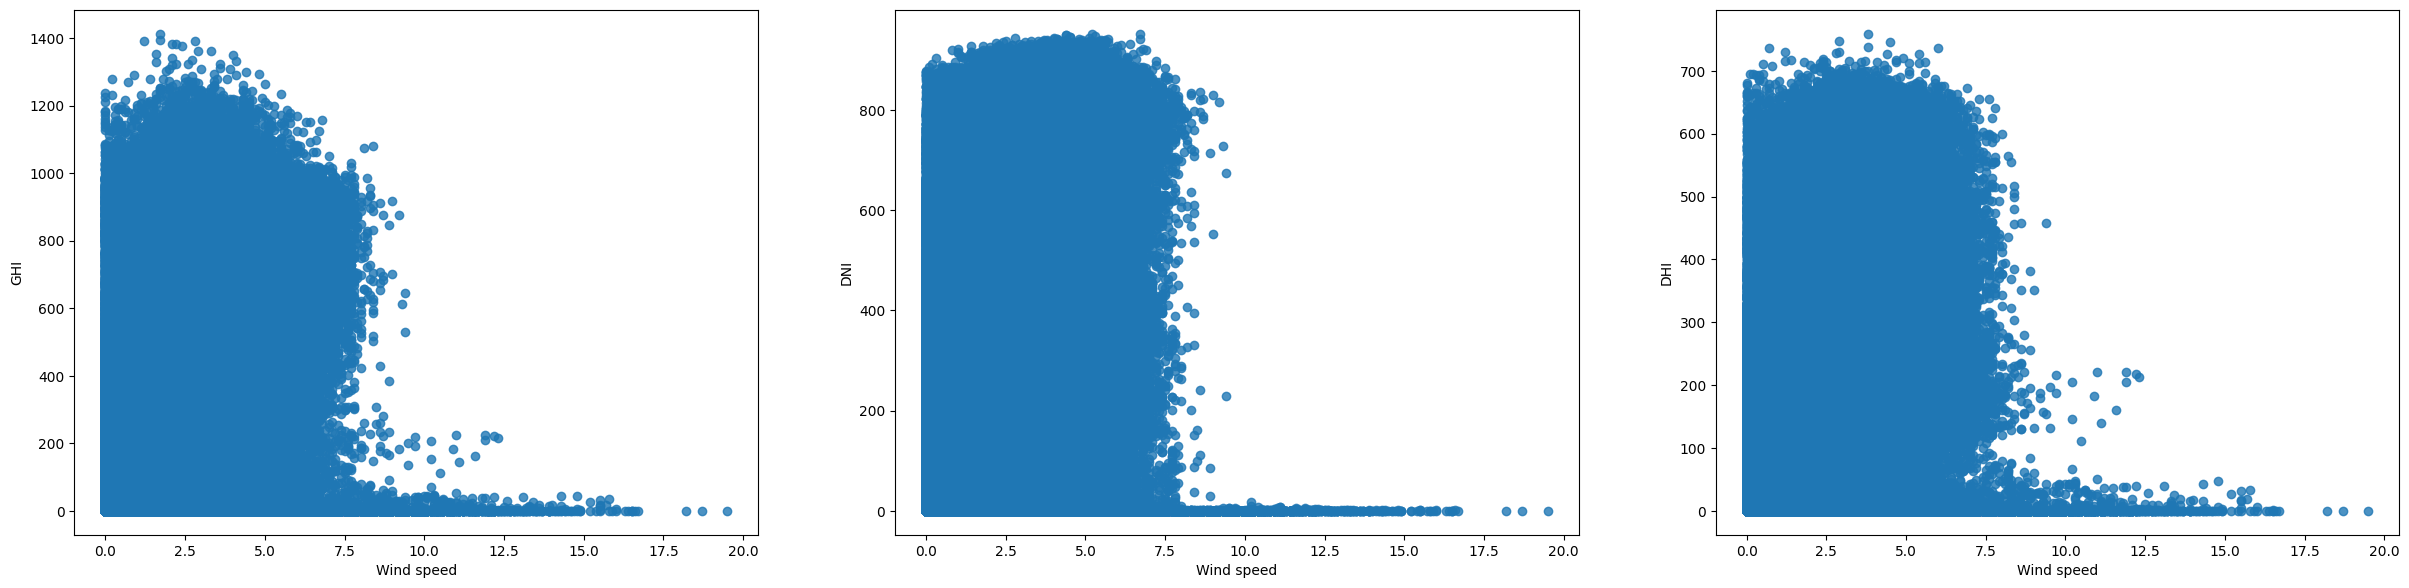

In [34]:
plt.figure(figsize=(30, 15))

plt.subplot(2, 3, 1)
sb.regplot(data = benin_df, x = 'WS', y = 'GHI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('GHI')

plt.subplot(2, 3, 2)
sb.regplot(data = benin_df, x = 'WS', y = 'DNI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('DNI')

plt.subplot(2, 3, 3)
sb.regplot(data = benin_df, x = 'WS', y = 'DHI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('DHI')

plt.show();

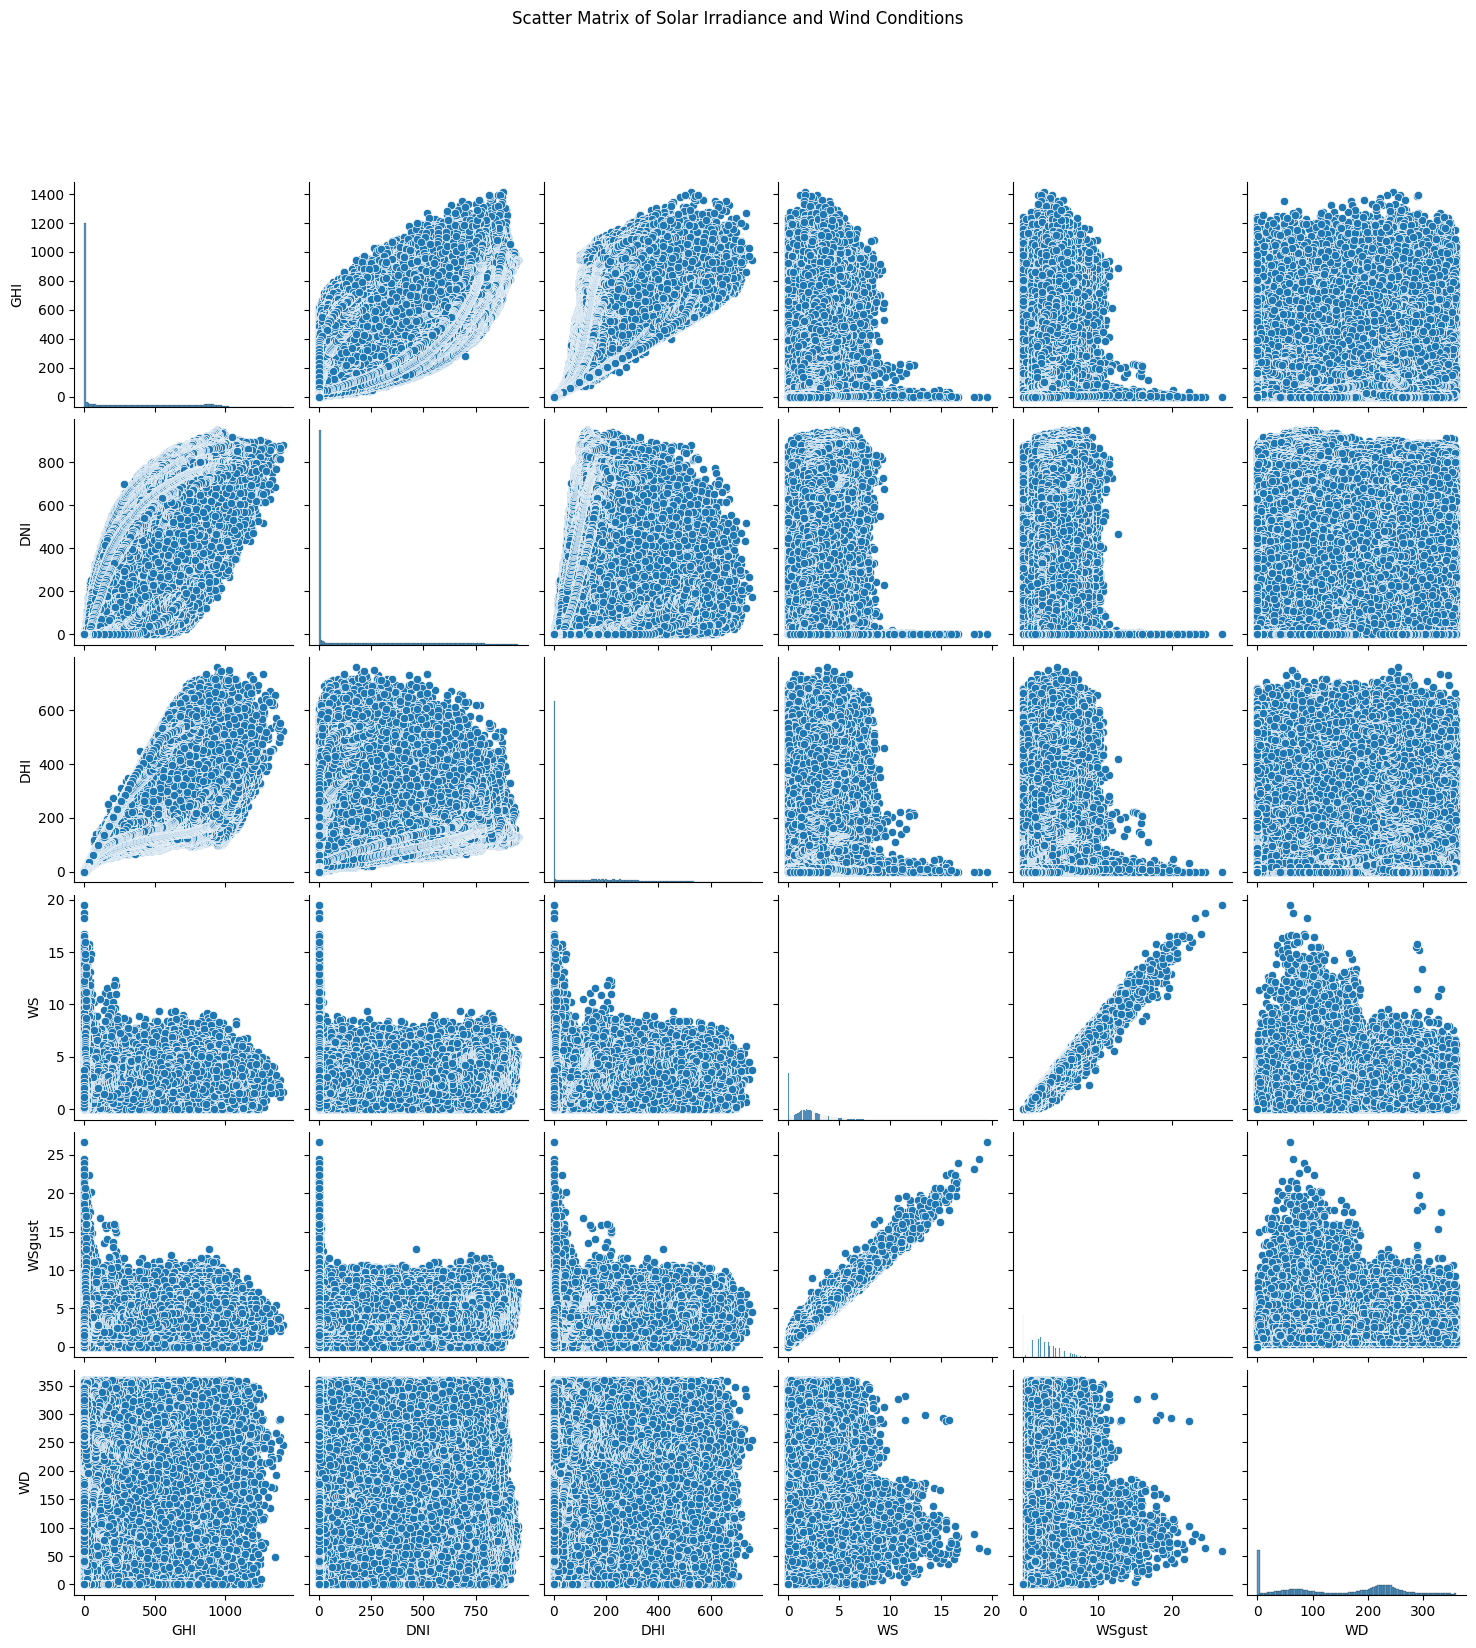

In [35]:
# Plot scatter matrix (pair plot)
sb.pairplot(benin_df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']])
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.1)
plt.show()


### Wind Analysis

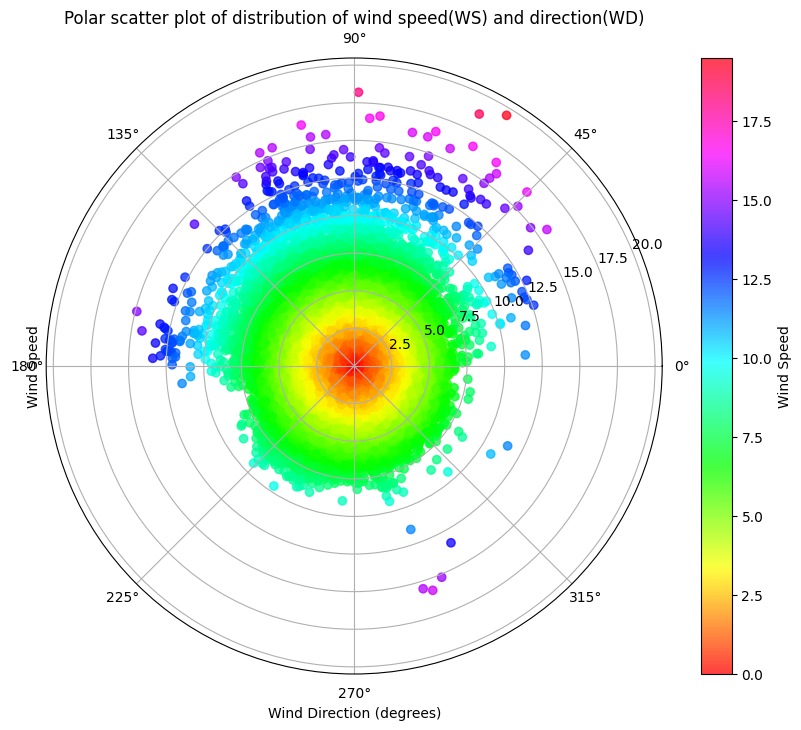

In [37]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# convert wind direction from degrees to radians
wd_rad = np.deg2rad(benin_df['WD'])

# scatter plot with WD as the angle and WS as radius
scatter = ax.scatter(wd_rad, benin_df['WS'], c=benin_df['WS'], cmap='hsv', alpha=0.75)

plt.colorbar(scatter, ax=ax, label='Wind Speed')


ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed')

# Show plot
plt.title('Polar scatter plot of distribution of wind speed(WS) and direction(WD)')
plt.show()


### Temperature Analysis

In [43]:
benin_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      241.958821     167.441866     116.993033     236.589496   
std       330.101787     261.547532     157.463619     326.894859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.800000       0.000000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  525600.000000  
mean       32.471736  
std        12.348743  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000

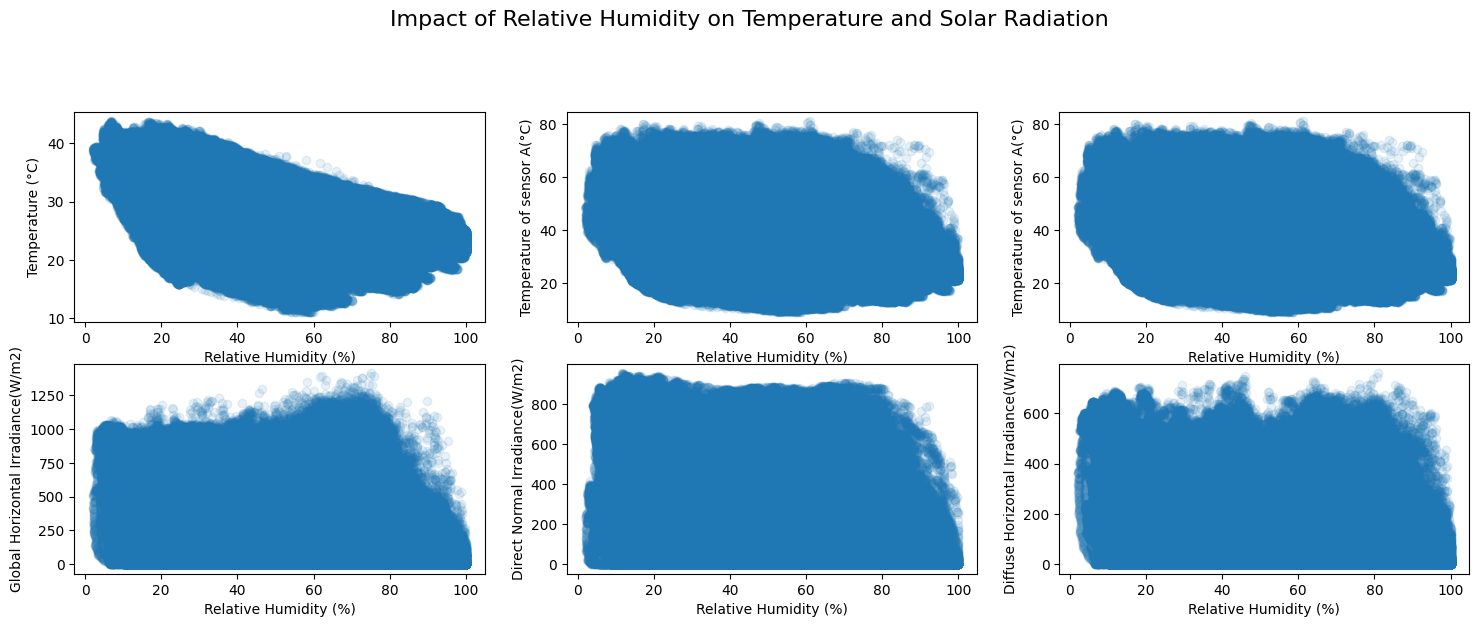

In [29]:
plt.figure(figsize = [18, 6])
plt.subplot(2, 3, 1)
sb.regplot(data = benin_df, x = 'RH', y = 'Tamb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

plt.subplot(2, 3, 2)
sb.regplot(data = benin_df, x = 'RH', y = 'TModA', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of sensor A(°C)')

plt.subplot(2, 3, 3)
sb.regplot(data = benin_df, x = 'RH', y = 'TModA', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of sensor A(°C)')

plt.subplot(2, 3, 4)
sb.regplot(data = benin_df, x = 'RH', y = 'GHI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance(W/m2)')

plt.subplot(2, 3, 5)
sb.regplot(data = benin_df, x = 'RH', y = 'DNI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance(W/m2)')

plt.subplot(2, 3, 6)
sb.regplot(data = benin_df, x = 'RH', y = 'DHI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Diffuse Horizontal Irradiance(W/m2)')

plt.suptitle('Impact of Relative Humidity on Temperature and Solar Radiation', y=1.05, fontsize=16)
plt.show()

### Histograms

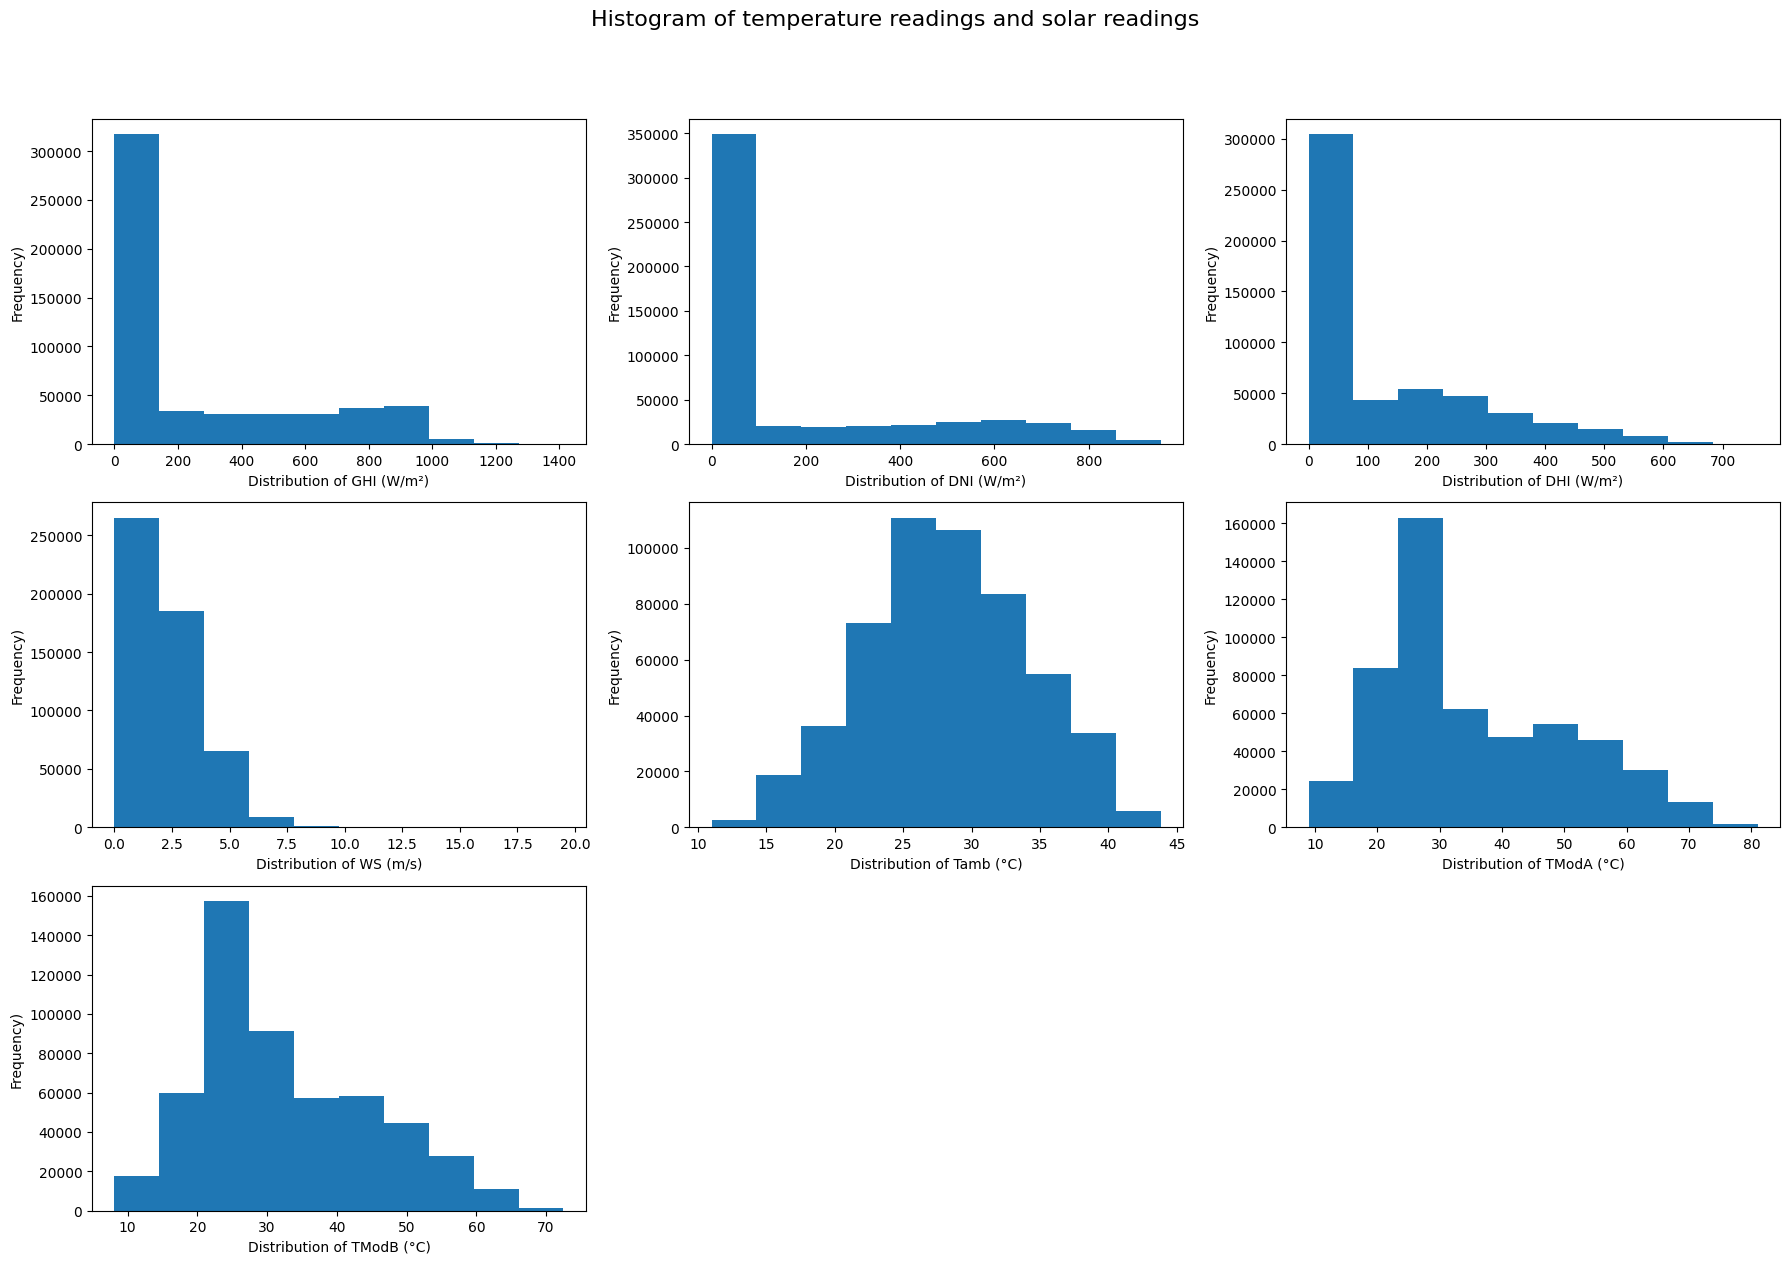

In [77]:
# variables we want to create histograms for

plt.figure(figsize = [18, 12])

plt.subplot(3, 3, 1)
benin_df['GHI'].plot.hist()
plt.xlabel('Distribution of GHI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 2)
benin_df['DNI'].plot.hist()
plt.xlabel('Distribution of DNI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 3)
benin_df['DHI'].plot.hist()
plt.xlabel('Distribution of DHI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 4)
benin_df['WS'].plot.hist()
plt.xlabel('Distribution of WS (m/s)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 5)
benin_df['Tamb'].plot.hist()
plt.xlabel('Distribution of Tamb (°C)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 6)
benin_df['TModA'].plot.hist()
plt.xlabel('Distribution of TModA (°C)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 7)
benin_df['TModB'].plot.hist()
plt.xlabel('Distribution of TModB (°C)')
plt.ylabel('Frequency)')



plt.suptitle('Histogram of temperature readings and solar readings', y=1.05, fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()



### Z-score Analysis
>a measurement of how many standard deviations away a data point is from the mean of a distribution. A z-score of 0 indicates that the data point’s score is the same as the mean score. A positive z-score indicates that the data point is above average, while a negative z-score indicates that the data point is below average.

```
Z = (X−μ)/σ
where 
𝑋 is the data point, 
μ is the mean of the data, and 
σ is the standard deviation.
```

In [30]:
benin_df.head(2)

Date  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0  ...   

      GHI_z  GHI_outlier     DNI_z  DNI_outlier     DHI_z  DHI_outlier  \
0 -0.732983        False -0.640197        False -0.742985        False   
1 -0.732983        False -0.640197        False -0.742985        False   

       WS_z  WS_outlier    Tamb_z  Tamb_outlier  
0 -1.322831       False -0.334164         False  
1 -1.322831       False -0.334164         False  

[2 rows x 28 columns]

In [28]:
benin_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      241.958821     167.441866     116.993033     236.589496   
std       330.101787     261.547532     157.463619     326.894859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.800000       0.000000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev  ...             BP       Cleaning  \
count  525600.000000  525600.000000  ...  525600.000000  525600.000000   
mean        2.809195       0.473390  ...     994.197199       0.000923   
std         2.029120       0.273395  ...       2.474993       0.030363   
min         0.000000       0.000000  ...     985.000000       0.000000   
25%         1.300000       0.400000  ...     993.000000       0.000000   
50%         2.600000       0.500000  ...     994.000000       0.000000   
75%         4.100000       0.600000  ...     996.000000       0.000000   
max        26.600000       4.200000  ...    1003.000000       1.000000   

       Precipitation          TModA          TModB         GHI_z  \
count  525600.000000  525600.000000  525600.000000  5.256000e+05   
mean        0.001905      35.246026      32.471736 -2.254919e-17   
std         0.037115      14.807258      12.348743  1.000001e+00   
min         0.000000       9.000000       8.100000 -7.329832e-01   
25%         0.000000      24.200000      23.600000 -7.329832e-01   
50%         0.000000      30.000000      28.900000 -7.275303e-01   
75%         0.000000      46.900000      41.500000  7.314150e-01   
max         2.500000      81.000000      72.500000  3.547519e+00   

              DNI_z         DHI_z          WS_z        Tamb_z  
count  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05  
mean  -1.213438e-16  4.239464e-17  1.773653e-17  5.671364e-16  
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  
min   -6.401973e-01 -7.429852e-01 -1.322831e+00 -2.899871e+00  
25%   -6.401973e-01 -7.429852e-01 -6.991816e-01 -6.717568e-01  
50%   -6.401973e-01 -7.328242e-01 -1.378969e-01 -3.032985e-02  
75%    5.611151e-01  6.306667e-01  6.104827e-01  6.954954e-01  
max    3.000827e+00  4.078451e+00  1.083834e+01  2.636656e+00  

[8 rows x 22 columns]

In [31]:
#cols to calculate the z-scores
cols = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

z_scores, flagged_data_pts = calculate_z_scores(benin_df, cols)

#print the z-scores and the flagged data points
print("Z-Scores :\n", z_scores)
print("\n Flagged outliers which deviate from the mean :\n", flagged_data_pts)

Z-Scores :
              GHI       DNI       DHI        WS      Tamb
0      -0.732983 -0.640197 -0.742985 -1.322831 -0.334164
1      -0.732983 -0.640197 -0.742985 -1.322831 -0.334164
2      -0.732983 -0.640197 -0.742985 -1.135736 -0.334164
3      -0.732983 -0.640197 -0.742985 -1.198101 -0.334164
4      -0.732983 -0.640197 -0.742985 -1.260466 -0.334164
...          ...       ...       ...       ...       ...
525595 -0.732983 -0.640197 -0.742985 -1.135736 -0.857433
525596 -0.732983 -0.640197 -0.742985 -1.198101 -0.857433
525597 -0.732983 -0.640197 -0.742985 -0.948641 -0.857433
525598 -0.732983 -0.640197 -0.742985 -0.761547 -0.857433
525599 -0.732983 -0.640197 -0.742985 -0.574452 -0.857433

[525600 rows x 5 columns]

 Flagged outliers which deviate from the mean :
               Date  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0       2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1       2021-08-09  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.

>Negative Z-Score: A negative Z-score indicates that the data point is below the mean. For example, a Z-score of -0.5 means the data point is 0.5 standard deviations below the mean.

>An element having a z-score of less than 0 represents that the element is less than the mean.




In [39]:
print(z_scores.max(), z_scores.min())

GHI      3.547519
DNI      3.000827
DHI      4.078451
WS      10.838337
Tamb     2.636656
dtype: float64 GHI    -0.732983
DNI    -0.640197
DHI    -0.742985
WS     -1.322831
Tamb   -2.899871
dtype: float64


In [51]:
# Filter z-scores 
positive_z_scores = z_scores[z_scores > 0]

negative_z_scores = z_scores[z_scores < 0]

print(z_scores.count(), positive_z_scores.count()+negative_z_scores.count(), positive_z_scores.count(), negative_z_scores.count())


GHI     525600
DNI     525600
DHI     525600
WS      525600
Tamb    525600
dtype: int64 GHI     525600
DNI     525600
DHI     525600
WS      525600
Tamb    525600
dtype: int64 GHI     184619
DNI     161897
DHI     200366
WS      231757
Tamb    256917
dtype: int64 GHI     340981
DNI     363703
DHI     325234
WS      293843
Tamb    268683
dtype: int64


In [71]:
outliers_ghi = flagged_data_pts[flagged_data_pts['GHI_outlier']==True]
outliers_dni = flagged_data_pts[flagged_data_pts['DNI_outlier']==True]
outliers_dhi = flagged_data_pts[flagged_data_pts['DHI_outlier']==True]
outliers_ws = flagged_data_pts[flagged_data_pts['WS_outlier']==True]
outliers_tamp = flagged_data_pts[flagged_data_pts['Tamb_outlier']==True]

print(f"Number of outlies in GHI: {outliers_ghi.count().sum()} \n"
      f"DNI: {outliers_dni.count().sum()} \n"
      f"DHI: {outliers_dhi.count().sum()} \n"
      f"WS: {outliers_ws.count().sum()} \n"
      f"Tamb: {outliers_tamp.count().sum()}")



Number of outlies in GHI: 2520 
DNI: 56 
DHI: 108892 
WS: 87052 
Tamb: 0


### Bubble charts

>A bubble chart is primarily used to depict and show relationships between numeric variables.

/home/izzy/anaconda3/envs/kiam/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


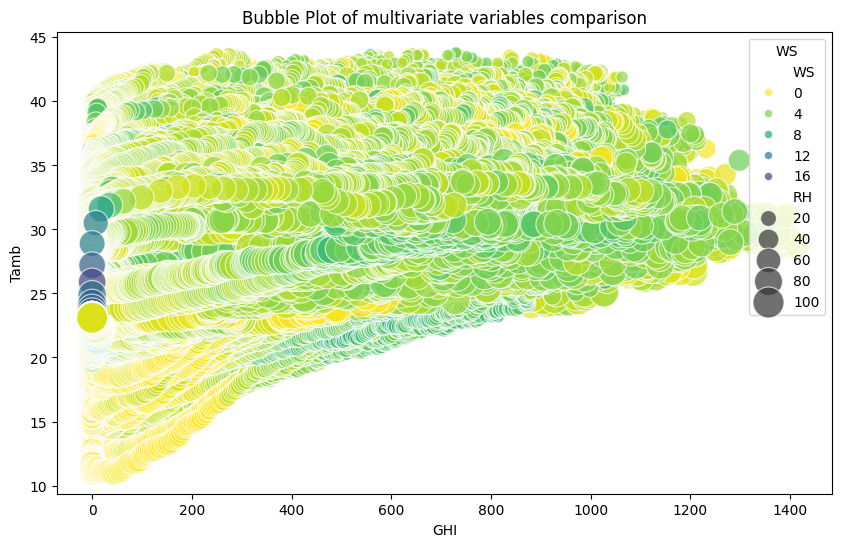

In [75]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=benin_df, x='GHI', y='Tamb', size='RH', sizes=(50, 500), hue='WS', palette='viridis_r', legend='brief', alpha=0.7)

# Add labels and title
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Plot of multivariate variables comparison')
plt.legend(title='WS')

plt.show();
